In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler

In [44]:
def ols(X,y):
    
    X = X
    y = y
    X = sm.add_constant(X)

    mod = sm.OLS(y,X)
    res = mod.fit()

    return(res)

def arima(X,y,p=0,d=0,q=0):
    
    exog = X
    endog = y
    
    model = sm.tsa.ARIMA(endog, order=(p,d,q), exog=exog)
    results = model.fit()
    
    return results

def logit(X,y):
    y = y
    X = X

    X = sm.add_constant(X)

    logit_model = sm.Logit(y, X).fit()
    
    return logit_model


def t_test(a,b):
    
    group_a = a
    group_b = b

    # t-test
    result = stats.ttest_ind(group_a.values, group_b.values)
    
    # calc effect size
    mean1 = np.mean(group_a)
    mean2 = np.mean(group_b)
    s1 = np.std(group_a, ddof=1)
    s2 = np.std(group_b, ddof=1)
    s = np.sqrt(((s1 ** 2) + (s2 ** 2)) / 2)
    d = (mean1 - mean2) / s
    
    # degrees of freedom
    df = len(group_a) + len(group_b) - 2
    
    supp_results = {
        'cohen_d':d,
        'df':df,
        'mean_a':mean1,
        'mean_b':mean2,
        'std_a':s1,
        'std_b':s2
    }

    return result, supp_results

def skewness_transform(df, col):
    
    df = df
    s_scaler = StandardScaler()
    pt_scaler = PowerTransformer(standardize=True)
    mm_scaler = MinMaxScaler()
    
    s_results = s_scaler.fit_transform(df[col].values.reshape(-1,1))
    pt_results = pt_scaler.fit_transform(df[col].values.reshape(-1,1))
    mm_results = mm_scaler.fit_transform(df[col].values.reshape(-1,1))
    
    df_temp = pd.DataFrame.from_records(s_results)
    df_temp["pt_results"] = pt_results
    df_temp["mm_results"] = mm_results
    
    fig, ax1 = plt.subplots(ncols=6, nrows=2, figsize=(20,7))
    
    fig.suptitle(f"{col}")
    
    ax1[0,0].set_title("Raw")
    ax1[0,1].set_title("Square Root")
    ax1[0,2].set_title("Natural Log")
    ax1[0,3].set_title("Standard")
    ax1[0,4].set_title("Yeo John")
    ax1[0,5].set_title("Min Max")
    
    ax1[0,0].hist(df[col])
    stats.probplot(df[col], dist="norm", plot=ax1[1,0]) 
    ax1[0,1].hist(np.sqrt(df[col]))
    stats.probplot(np.sqrt(df[col]), dist="norm", plot=ax1[1,1])
    ax1[0,3].hist(df_temp.iloc[:,0])
    stats.probplot(df_temp.iloc[:,0], dist="norm", plot=ax1[1,3]) 
    ax1[0,4].hist(df_temp.iloc[:,1])
    stats.probplot(df_temp.iloc[:,1], dist="norm", plot=ax1[1,4])
    ax1[0,5].hist(df_temp.iloc[:,2])
    stats.probplot(df_temp.iloc[:,2], dist="norm", plot=ax1[1,5])
    
    try:
        ax1[0,2].hist(np.log(df[col]))
        stats.probplot(np.log(df[col]), dist="norm", plot=ax1[1,2])
    except:
        pass
    
    skewness = {"col": col,
                "norm": df[col].skew(),
                "sqrt": np.sqrt(df[col]).skew(),
                "nlog": np.log(df[col]).skew(),
                "standard scaler": df_temp.iloc[:,0].skew(),
                "yeo john": df_temp.iloc[:,1].skew(),
                "min max": df_temp.iloc[:,1].skew()
               }
    
    ax1[1,0].set_ylabel("")
    ax1[1,1].set_ylabel("")
    ax1[1,2].set_ylabel("")
    ax1[1,3].set_ylabel("")
    ax1[1,4].set_ylabel("")
    ax1[1,5].set_ylabel("")
    
    ax1[1,0].set_title(round(skewness["norm"],3))
    ax1[1,1].set_title(round(skewness["sqrt"],3))
    ax1[1,2].set_title(round(skewness["nlog"],3))
    ax1[1,3].set_title(round(skewness["standard scaler"],3))
    ax1[1,4].set_title(round(skewness["yeo john"],3))
    ax1[1,5].set_title(round(skewness["min max"],3))
    
    plt.savefig(f"/Users/josepherlanger/Hertie/Pakistan Reading Material/datasets/figures/data_evaluations/h_{col}.png", bbox_inches="tight")
    
    return skewness

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufun

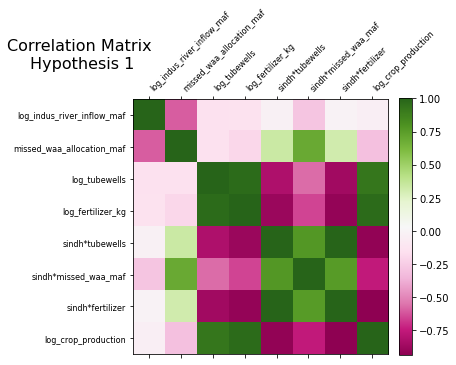

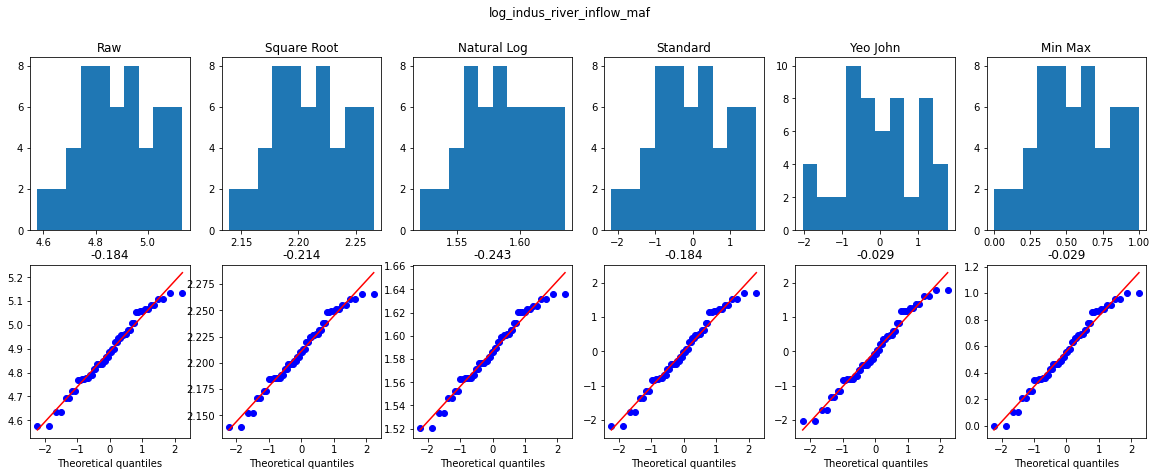

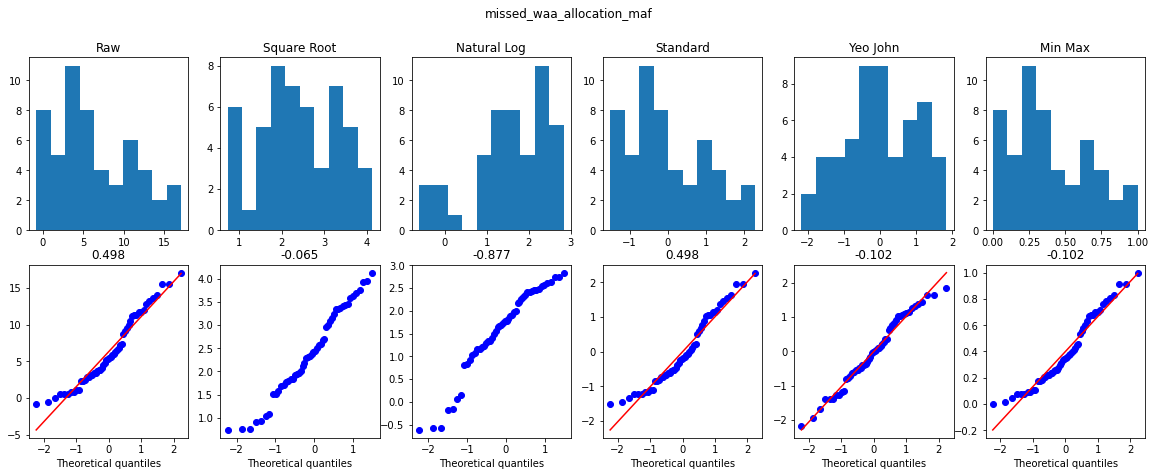

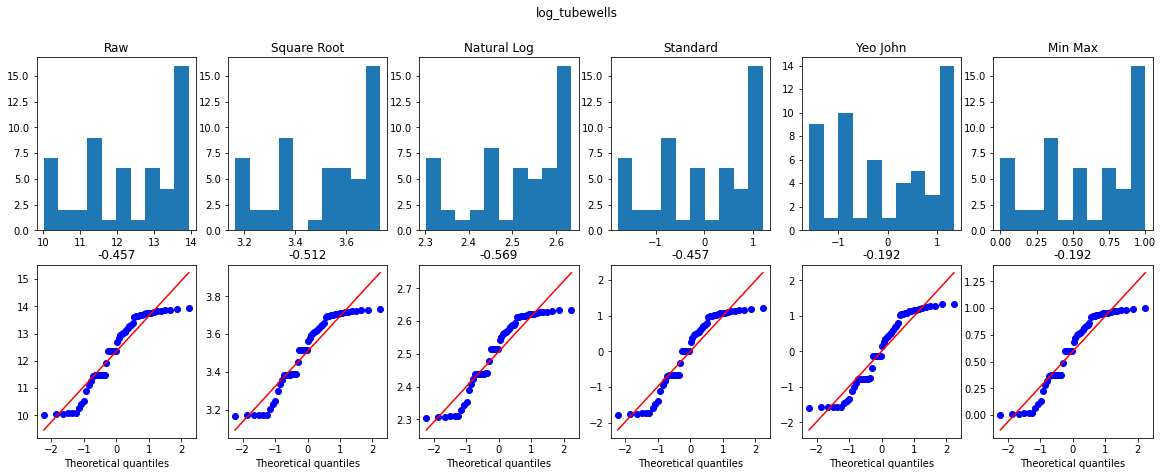

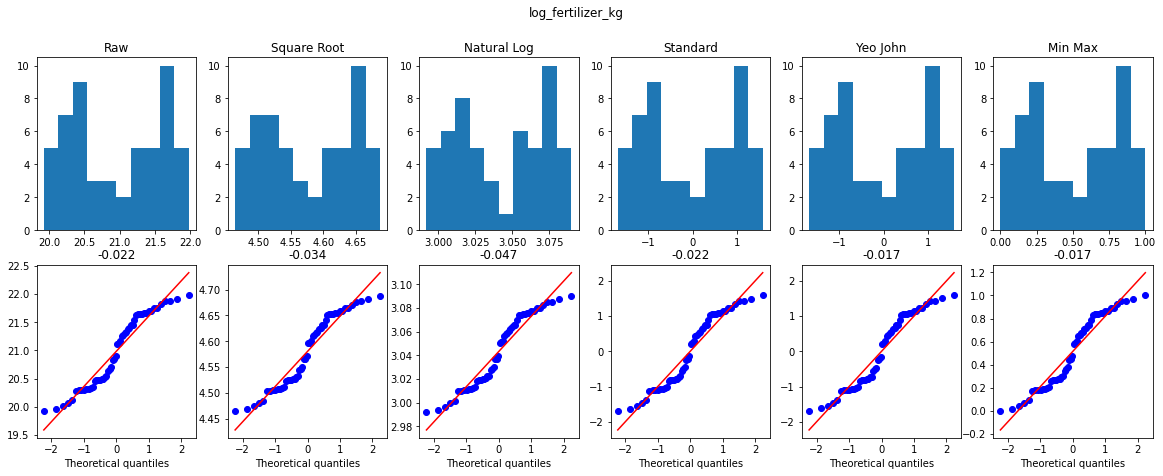

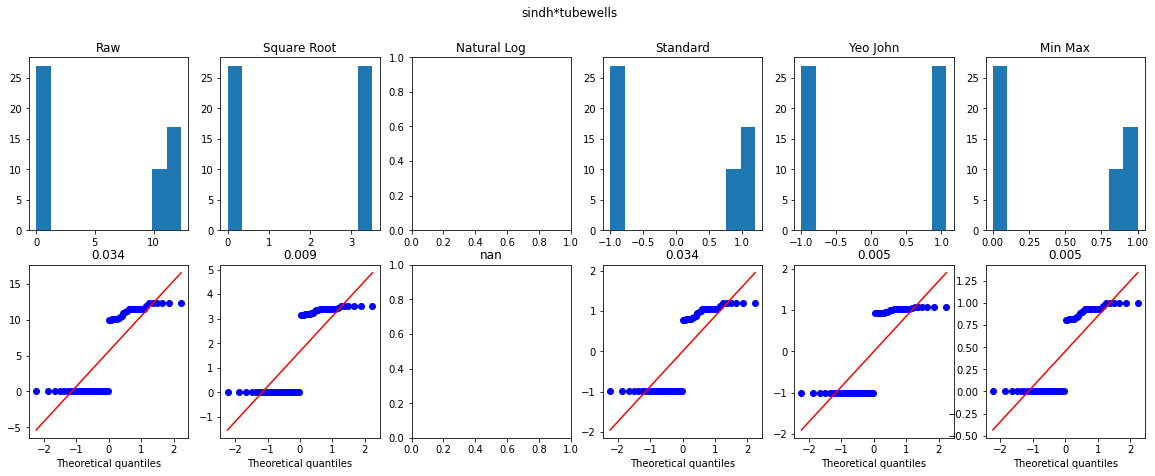

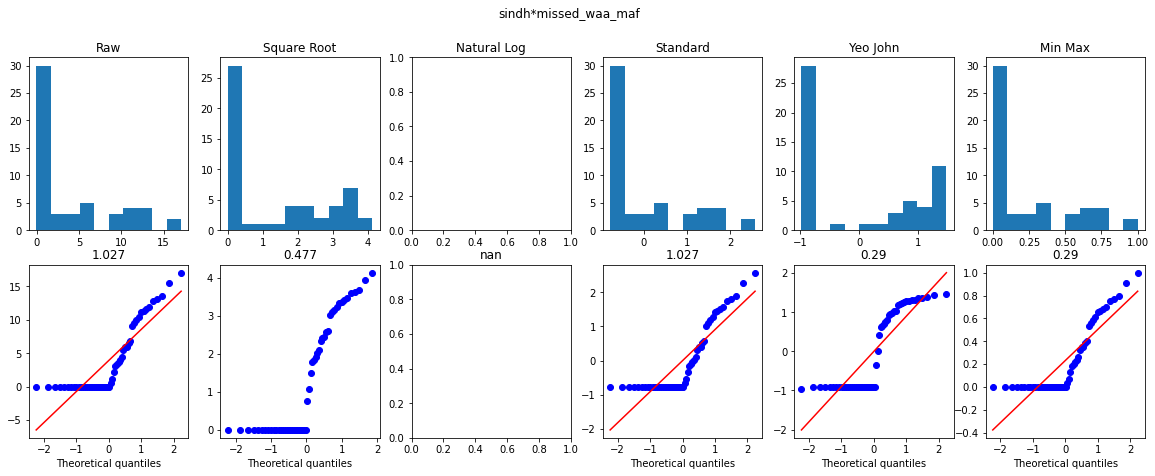

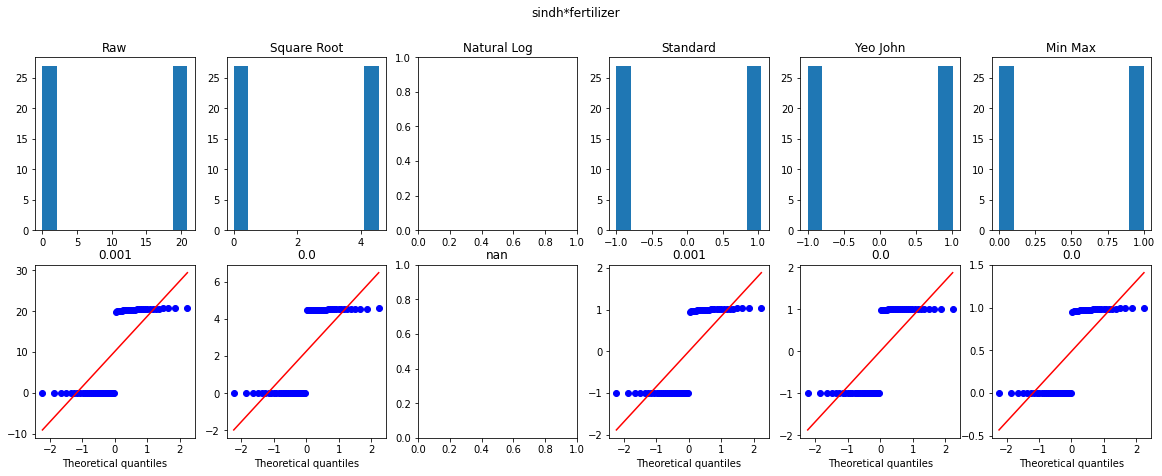

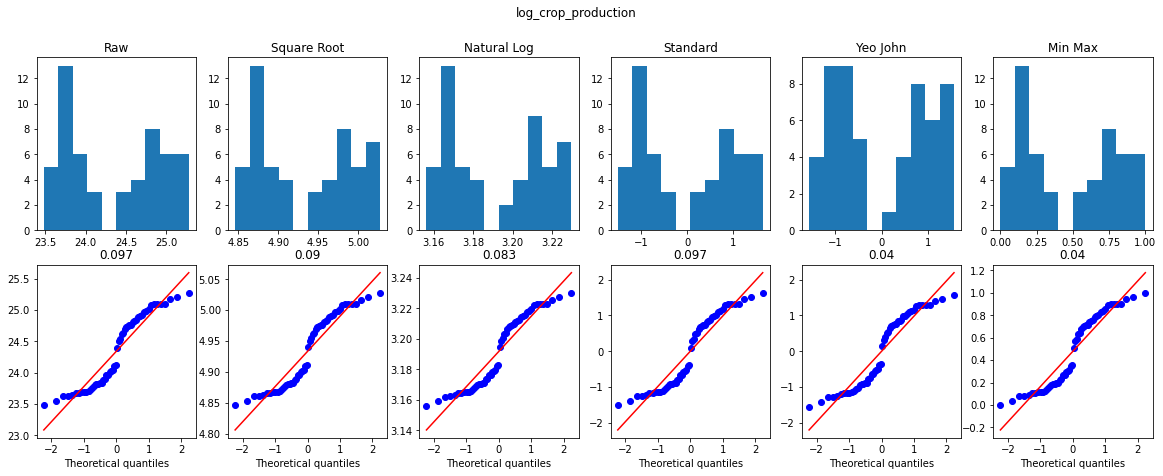

In [45]:
# Hypothesis 1

# Load Dataset
dfh1 = pd.read_csv("/Users/josepherlanger/Hertie/Pakistan Reading Material/datasets/combined_province_1964_2019_r.csv")

# Prepare Dataset
dfh1["is_sindh"] = np.where(dfh1["province"] == 'sindh',1,0)
dfh1["log_tubewells"] = np.log(dfh1["tubewells"])
dfh1["log_crop_production"] = np.log(dfh1["total_crop_production_kg"])
dfh1["missed_waa_allocation_maf"] = dfh1["waa_allocation_maf"] - dfh1["canal_withdrawal_maf "]
dfh1["sindh*tubewells"] = dfh1["is_sindh"]*dfh1["log_tubewells"]
dfh1["sindh*pct_waa_allocaiton"] = dfh1["is_sindh"]*dfh1["pct_waa_allocation"]
dfh1["log_indus_river_inflow_maf"] = np.log(dfh1["indus_river_inflow_maf"])
dfh1["sindh*missed_waa_maf"] = dfh1["is_sindh"]*dfh1["missed_waa_allocation_maf"]
dfh1["log_fertilizer_kg"] = np.log(dfh1["sale_fertilizer_kg"])
dfh1["sindh*fertilizer"] = dfh1["is_sindh"] * dfh1["log_fertilizer_kg"]

#Filter Dataset
dfh1 = dfh1.loc[(dfh1["period_beginning_in"] >= 1992) & (dfh1["period_beginning_in"] < 2019)]

# Correlation Matrix #

corr_cols = ["log_indus_river_inflow_maf",
             "missed_waa_allocation_maf",
             "log_tubewells",
             "log_fertilizer_kg",
             "sindh*tubewells",
             "sindh*missed_waa_maf",
             "sindh*fertilizer",
             "log_crop_production"
      ]

corr_ticks = []

fig = plt.figure(figsize=(5, 5))

for i in range(0,len(corr_cols)):
    corr_ticks.append(i)

ax = plt.matshow(dfh1[corr_cols].corr(), fignum=fig.number, cmap='PiYG')
fig.colorbar(ax,fraction=0.046, pad=0.04)

plt.xticks(ticks=corr_ticks, labels=corr_cols, rotation=45, fontsize=8, ha='left')
plt.yticks(ticks=corr_ticks, labels=corr_cols, fontsize=8)
plt.title("Correlation Matrix \nHypothesis 1", x=-0.2, y=1.1, fontsize=16)

plt.savefig("/Users/josepherlanger/Hertie/Pakistan Reading Material/datasets/figures/hypothesis1_corr_matrix.png", bbox_inches="tight")

# Skewness

for c in ["log_indus_river_inflow_maf",
             "missed_waa_allocation_maf",
             "log_tubewells",
             "log_fertilizer_kg",
             "sindh*tubewells",
             "sindh*missed_waa_maf",
             "sindh*fertilizer",
             "log_crop_production"
      ]:
    try:
        skewness_transform(dfh1,c)
    except:
        pass

In [46]:
# Hypothesis 1 Main Regression #

end = ["log_indus_river_inflow_maf",
       "missed_waa_allocation_maf",
       "log_tubewells",
       "log_fertilizer_kg",
       "sindh*tubewells",
       "sindh*missed_waa_maf",
       "sindh*fertilizer"
      ]

with open('h1_mainresults.txt', 'w') as fh:
    fh.write(ols(dfh1[end],
    dfh1["log_crop_production"]
   ).summary().as_text())
    
# Tubewell Regression

df_tubewell = pd.read_csv("/Users/josepherlanger/Hertie/Pakistan Reading Material/datasets/combined_province_1964_2019_r.csv")\
                .loc[:,["period_beginning_in","province","tubewells"]]

df_tubewell["is_sindh"] = np.where(df_tubewell["province"] == 'sindh',1,0)
df_tubewell["sindh*year"] = (df_tubewell["is_sindh"] * df_tubewell["period_beginning_in"])
df_tubewell["log_tubewells"] = np.log(df_tubewell["tubewells"])

with open('h1_tubewell.txt', 'w') as fh:
    fh.write(ols(df_tubewell.loc[~df_tubewell["tubewells"].isna(),["period_beginning_in","sindh*year"]],
    df_tubewell.loc[~df_tubewell["tubewells"].isna(),"tubewells"]
   ).summary().as_text())
    
# T-Test Allocation

df_waa = dfh1.pivot(values='delta_waa_allocation', index="period_beginning_in", columns="province")

with open('h1_ttest.txt','w') as fh:
    fh.write(str(t_test(df_waa['punjab'],df_waa['sindh'])))
    
# Inflow Lim

df_inflow = pd.read_csv('/Users/josepherlanger/Hertie/Pakistan Reading Material/datasets/total_water_flow_1987_2018.csv', index_col='period_beginning_in')

with open('h1_inflow.txt','w') as fh:
    fh.write(str(linregress(df_inflow.index, df_inflow[' total_river_fow_maf '])))

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  resu

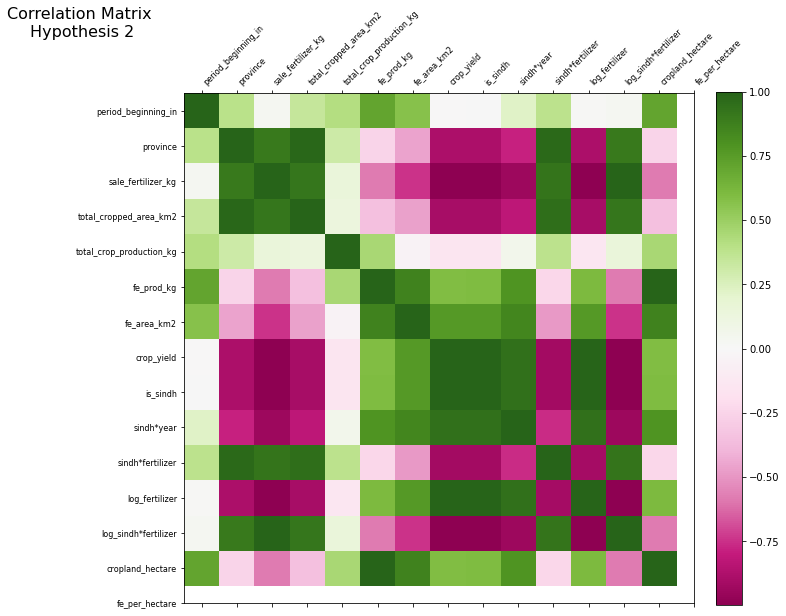

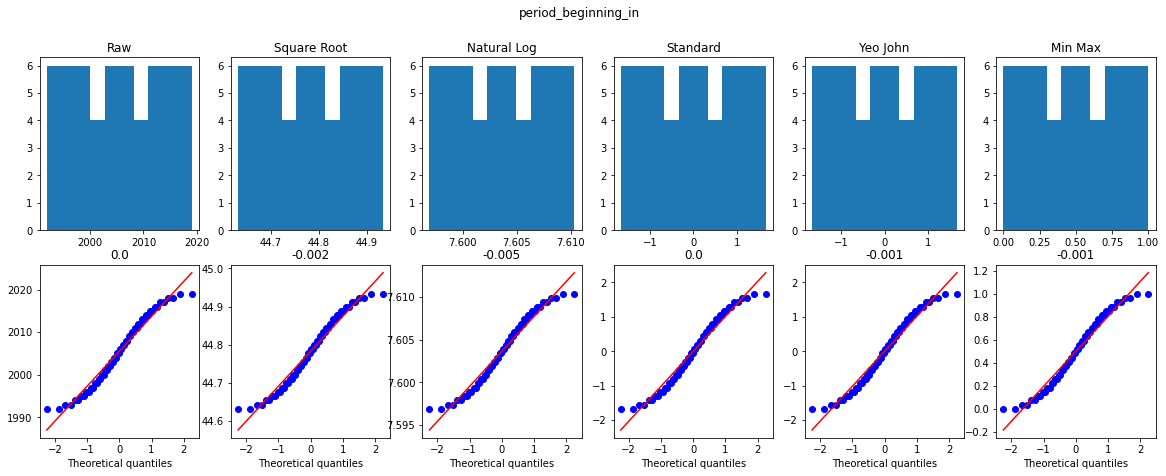

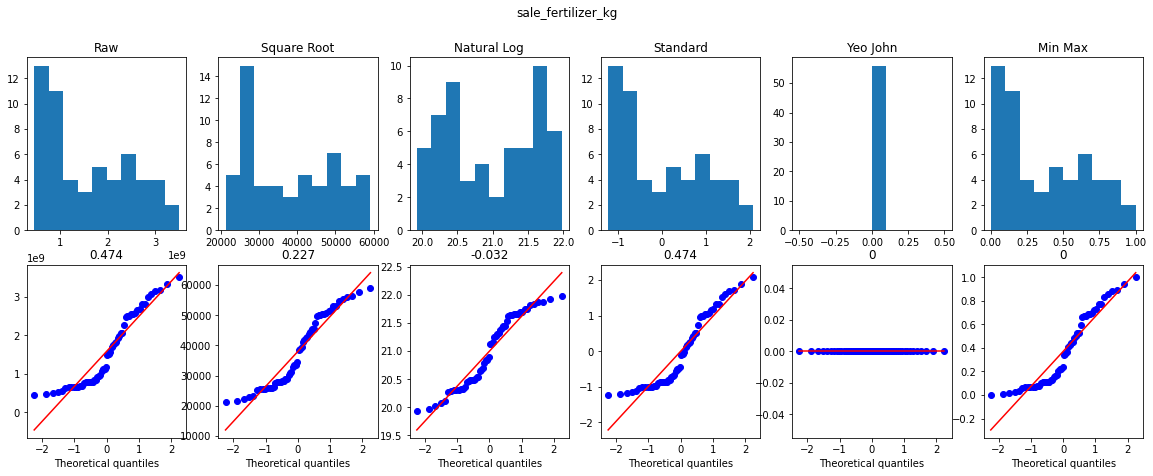

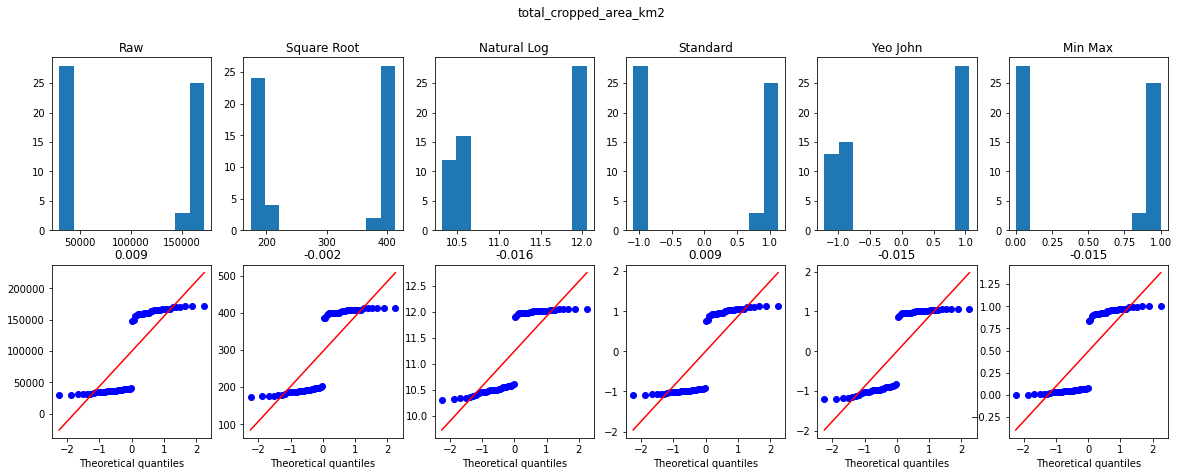

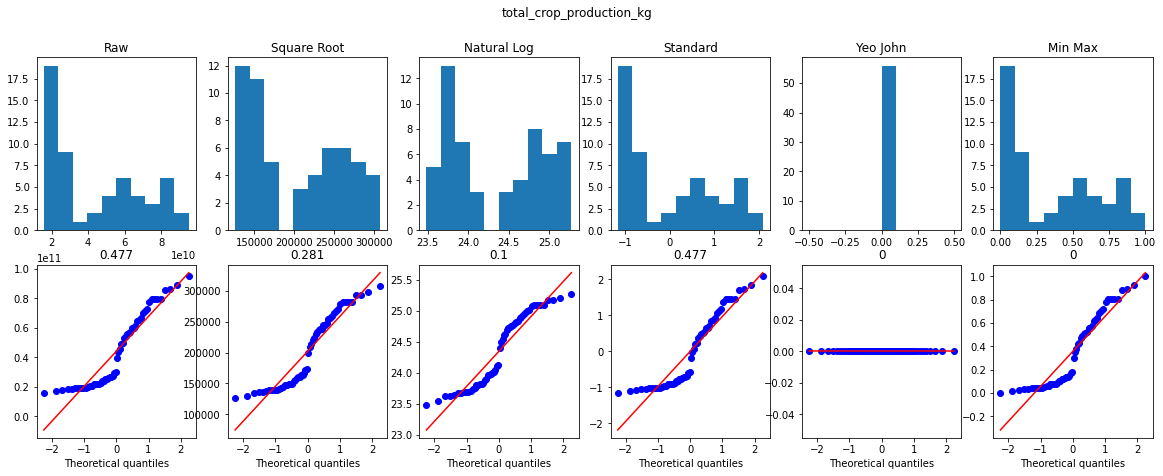

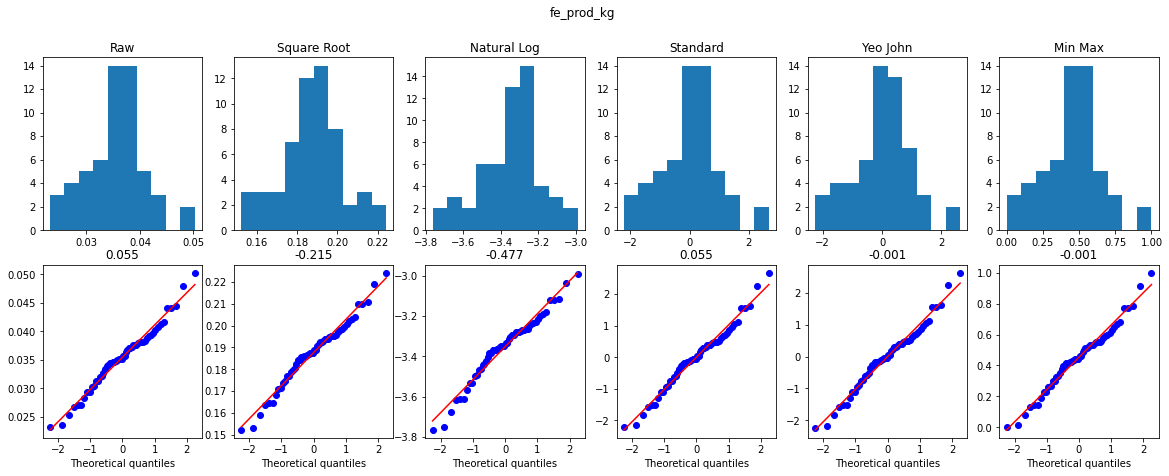

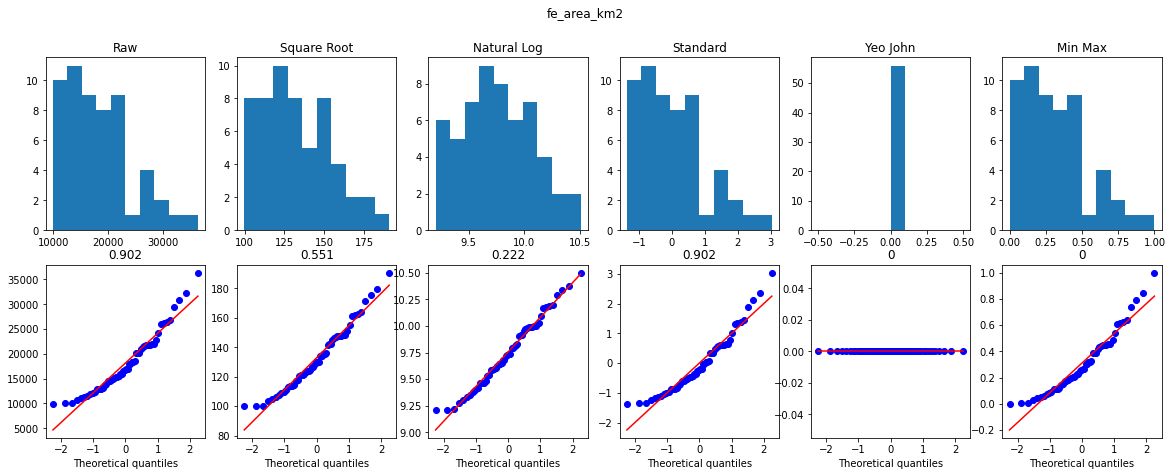

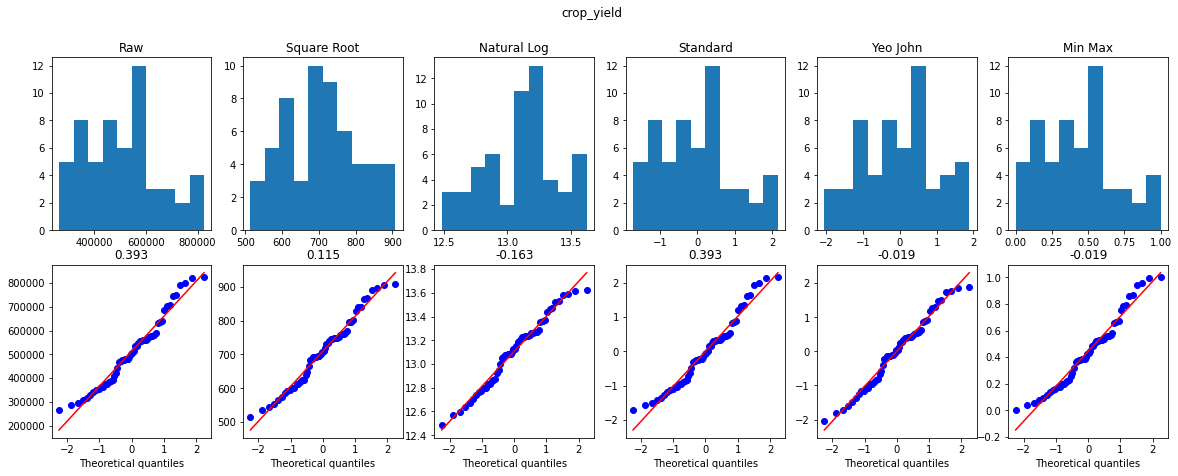

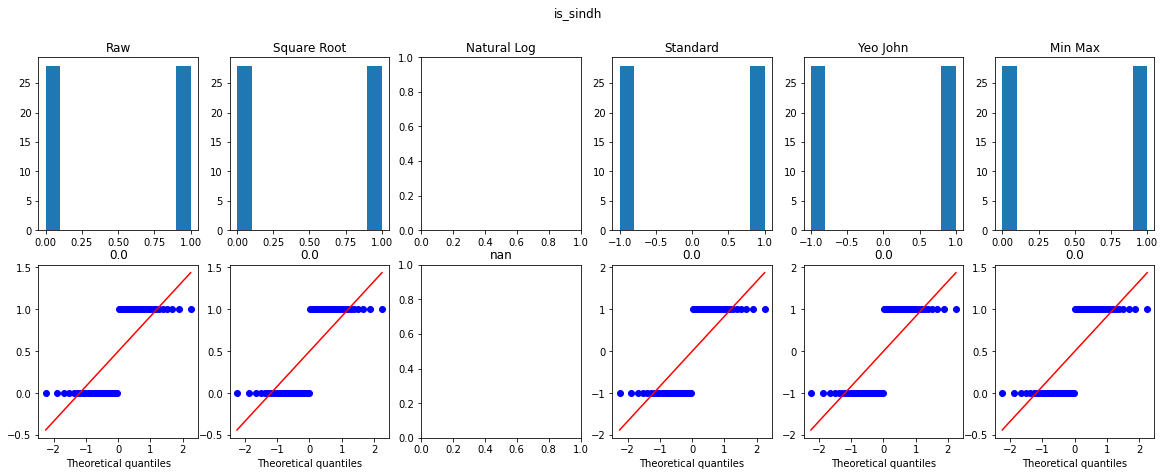

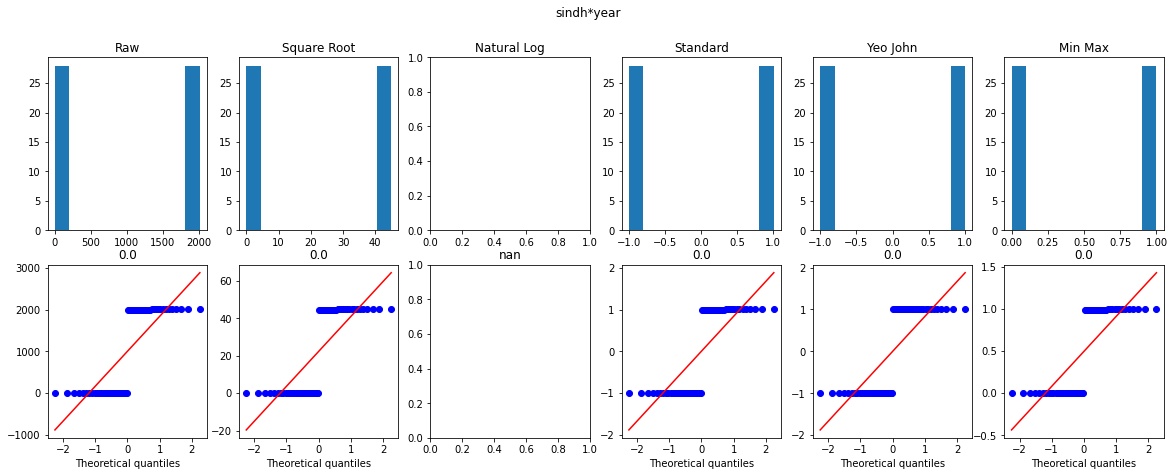

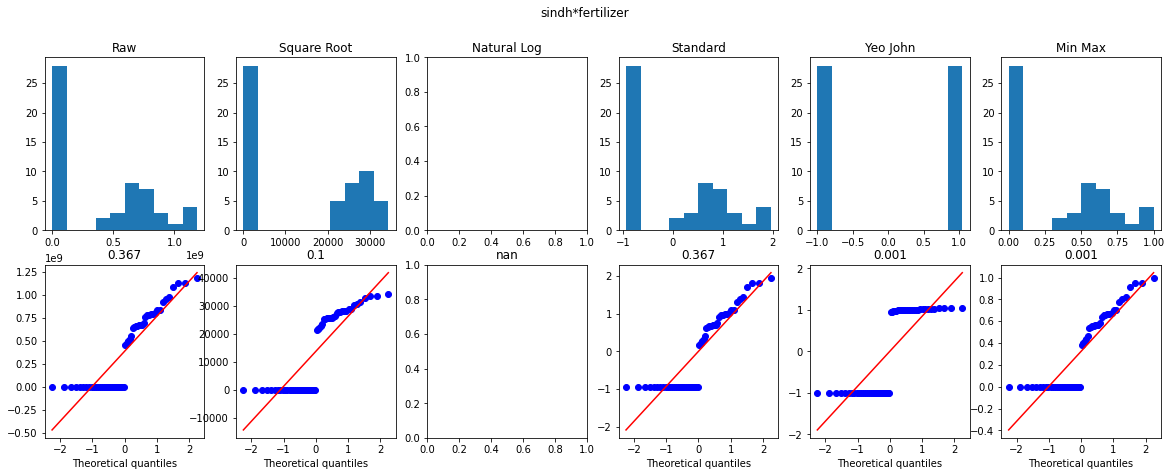

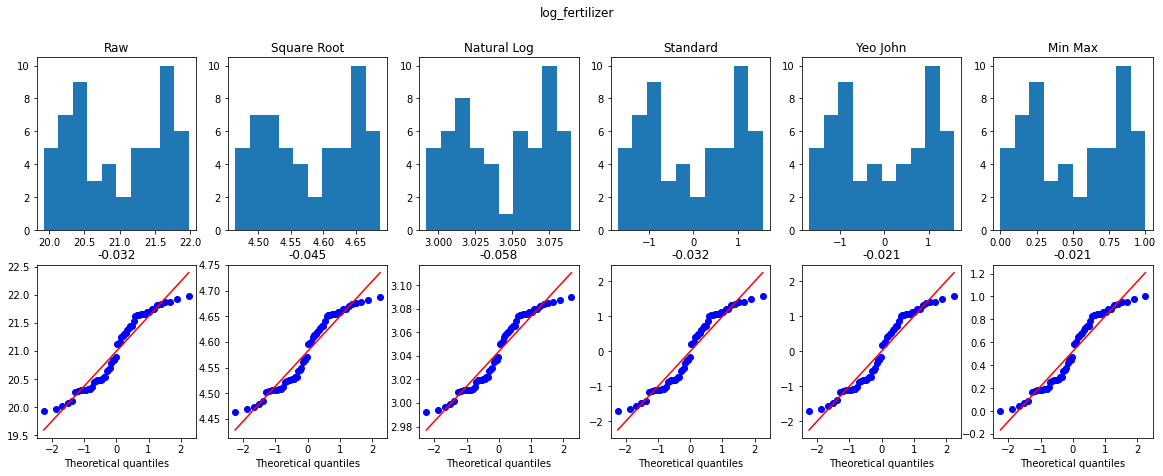

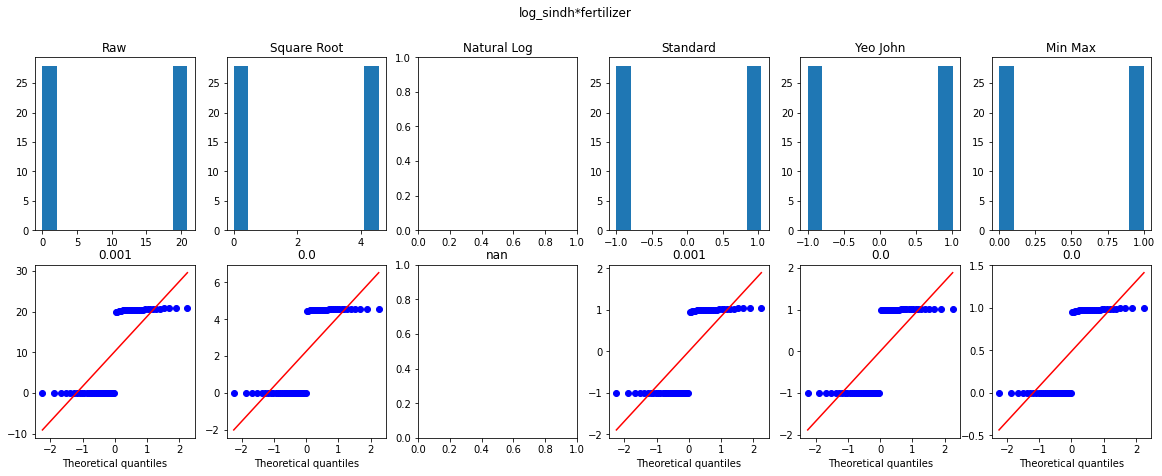

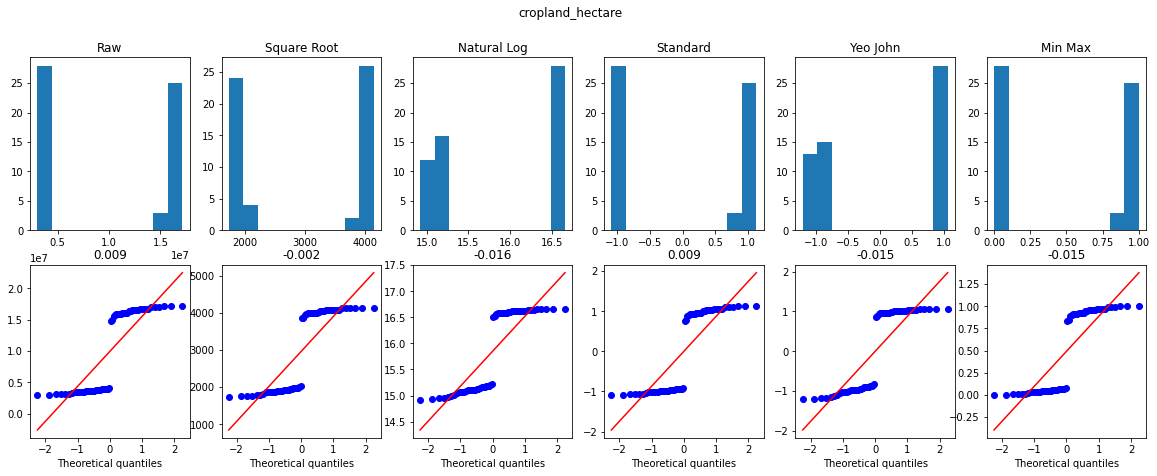

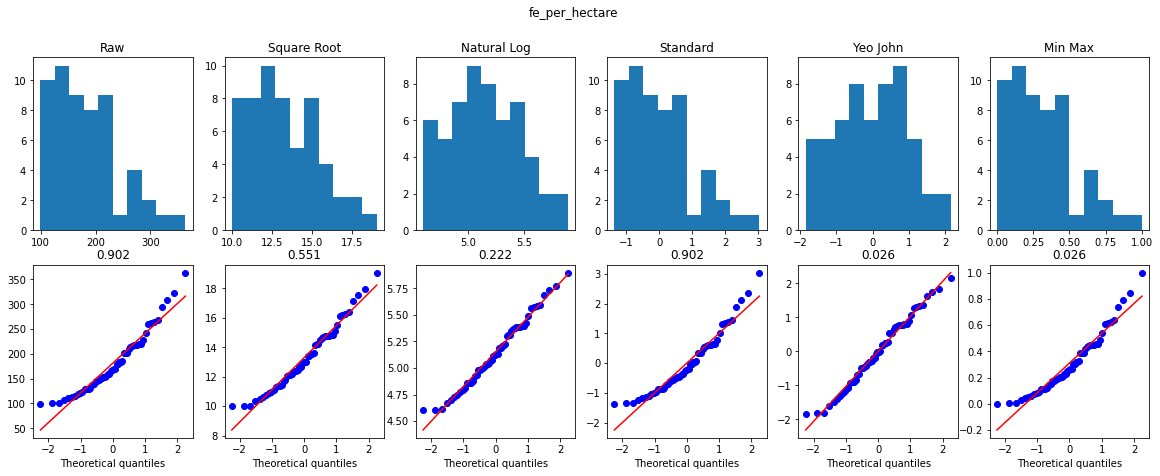

In [47]:
# Hypothesis 2

dfh2 = pd.read_csv("/Users/josepherlanger/Hertie/Pakistan Reading Material/datasets/combined_province_1964_2019_r.csv")
dfh2 = dfh2.loc[dfh2["period_beginning_in"] >= 1992,["period_beginning_in","province","sale_fertilizer_kg","total_cropped_area_km2","total_crop_production_kg"]]

dfh2["fe_prod_kg"] = dfh2["sale_fertilizer_kg"] / dfh2["total_crop_production_kg"]
dfh2["fe_area_km2"] = dfh2["sale_fertilizer_kg"] / dfh2["total_cropped_area_km2"]
dfh2["crop_yield"] = dfh2["total_crop_production_kg"] / dfh2["total_cropped_area_km2"]
dfh2["is_sindh"] = np.where(dfh2["province"] == 'sindh',1,0)
dfh2["sindh*year"] = dfh2["is_sindh"] * dfh2["period_beginning_in"]
dfh2["sindh*fertilizer"] = dfh2["is_sindh"] * dfh2["sale_fertilizer_kg"]
dfh2["log_fertilizer"] = np.log(dfh2["sale_fertilizer_kg"])
dfh2["log_sindh*fertilizer"] = dfh2["is_sindh"] * dfh2["log_fertilizer"]
dfh2["cropland_hectare"] = dfh2["total_cropped_area_km2"] * 100
dfh2["fe_per_hectare"] = dfh2["sale_fertilizer_kg"] / dfh2["cropland_hectare"]

corr_cols = dfh2.columns

corr_ticks = []

fig = plt.figure(figsize=(10, 10))

# Correlation

for i in range(0,len(corr_cols)):
    corr_ticks.append(i)

ax = plt.matshow(dfh2[corr_cols].corr(), fignum=fig.number, cmap='PiYG')
fig.colorbar(ax,fraction=0.046, pad=0.04)

plt.xticks(ticks=corr_ticks, labels=corr_cols, rotation=45, fontsize=8, ha='left')
plt.yticks(ticks=corr_ticks, labels=corr_cols, fontsize=8)
plt.title("Correlation Matrix \nHypothesis 2", x=-0.2, y=1.1, fontsize=16)

#Skewness

for c in dfh2.columns:
    try:
        skewness_transform(dfh2,c)
    except:
        pass

In [48]:
# Hypothesis 2 Main Regression

with open('h2_mainregression.txt','w') as fh:
    fh.write(ols(dfh2[["period_beginning_in","sindh*year","log_fertilizer","log_sindh*fertilizer"]],
    np.log(dfh2["fe_prod_kg"])
   ).summary().as_text())

    
# Lim Regression Fertilizer Concentration

df_conc = dfh2.pivot(index="period_beginning_in", columns="province", values="fe_per_hectare")

with open('h2_concentration_p.txt','w') as fh:
    fh.write(str(linregress(df_conc.index, df_conc["punjab"])))

with open('h2_concentration_s.txt','w') as fh:
    fh.write(str(linregress(df_conc.index, df_conc["sindh"])))
    
# Lim Regression Fertilizer Intensity

df_f_crop = dfh2.pivot(index="period_beginning_in", columns="province", values="fe_prod_kg")

with open('h2_intensity_p.txt','w') as fh:
    fh.write(str(linregress(df_f_crop.index, df_f_crop["punjab"])))

with open('h2_intensity_s.txt','w') as fh:
    fh.write(str(linregress(df_f_crop.index, df_f_crop["sindh"])))
    
# Lim Regression Crop Production

df_agri = pd.read_csv("/Users/josepherlanger/Hertie/Pakistan Reading Material/datasets/agriculture_production_hist.csv")
df_agri["Province"] = df_agri["Province"].apply(lambda x: x.lower())
df_agri_lim = df_agri.loc[(df_agri["Province"].isin(["punjab","sindh"]))].pivot(values="All Crops", index="Period", columns="Province")
df_agri_lim = df_agri_lim.loc[df_agri_lim.index >= 1992]

with open('h2_crop_p.txt','w') as fh:
    fh.write(str(linregress(df_agri_lim.index, df_agri_lim["punjab"])))
    
with open('h2_crop_s.txt','w') as fh:
    fh.write(str(linregress(df_agri_lim.index, df_agri_lim["sindh"])))

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


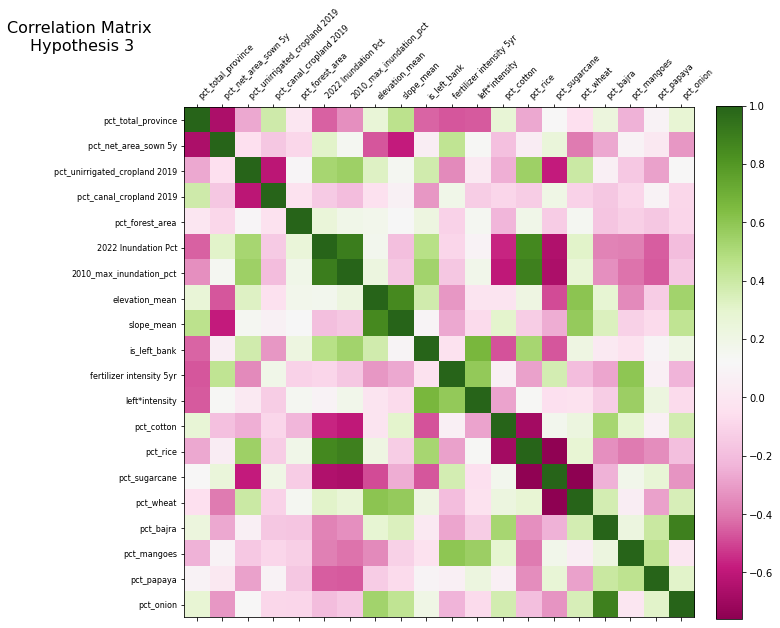

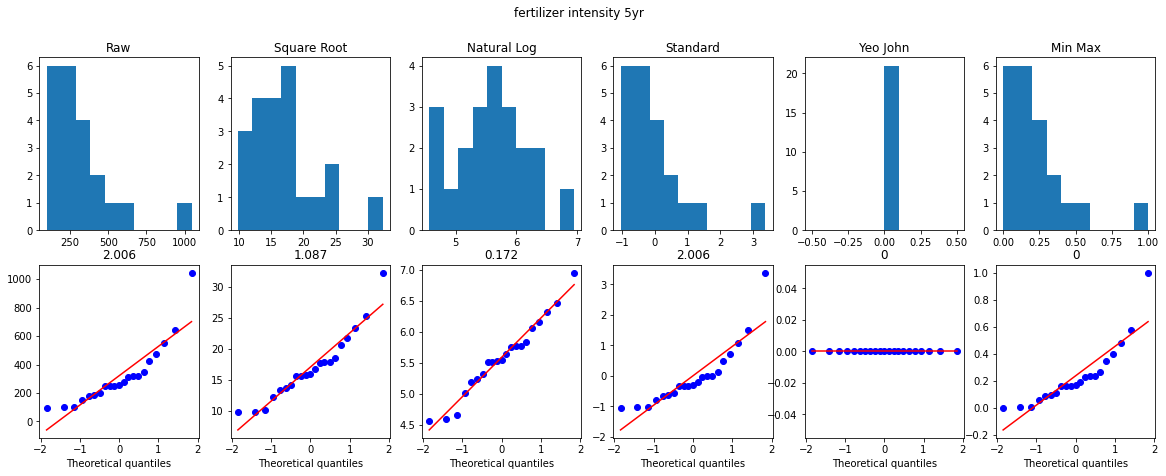

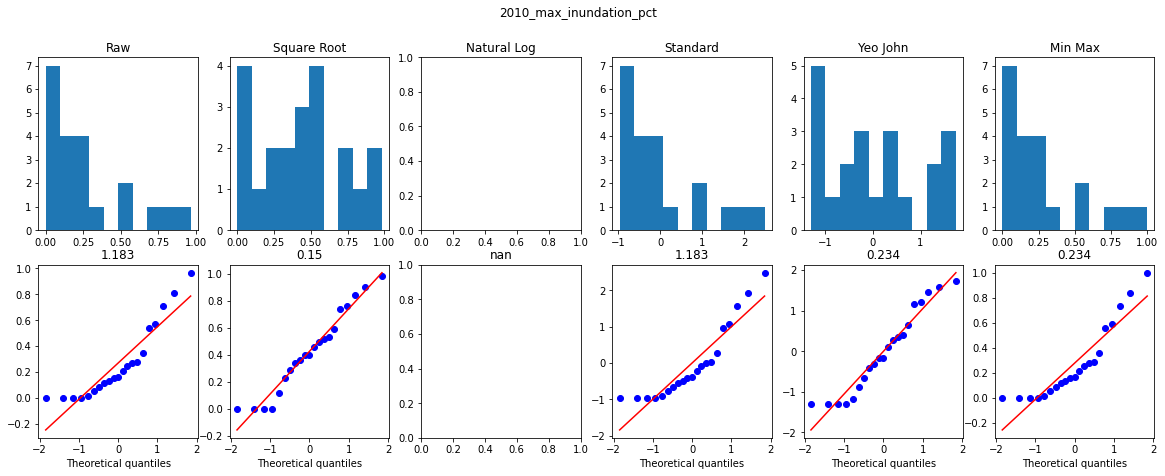

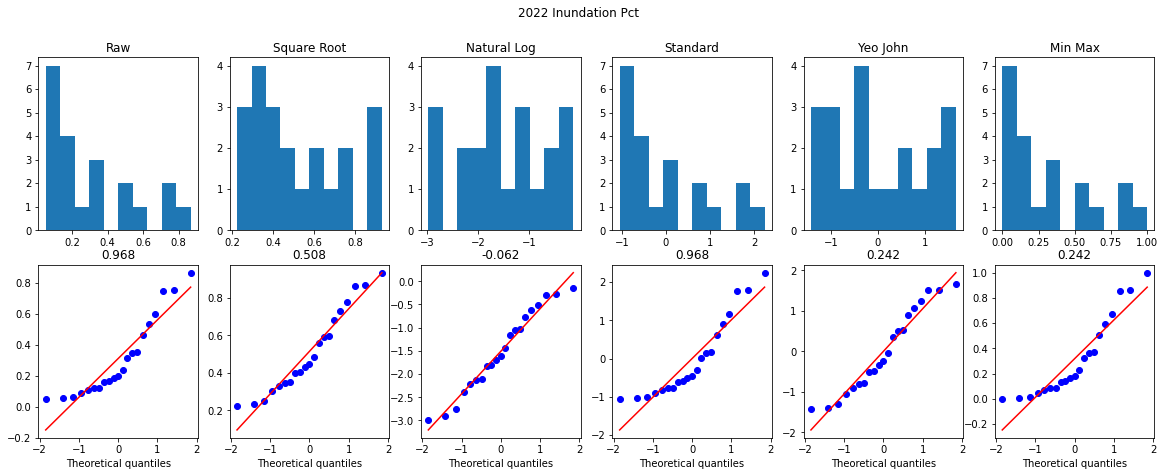

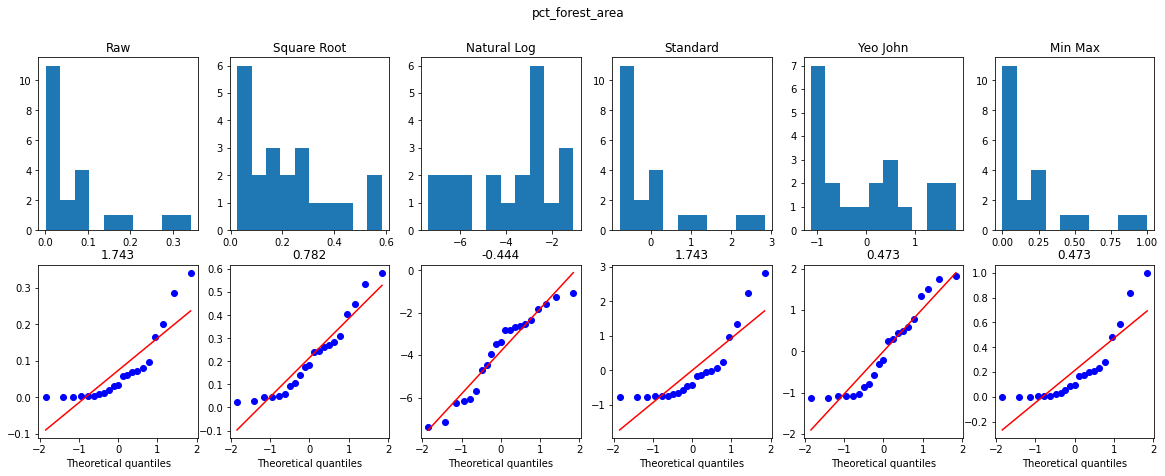

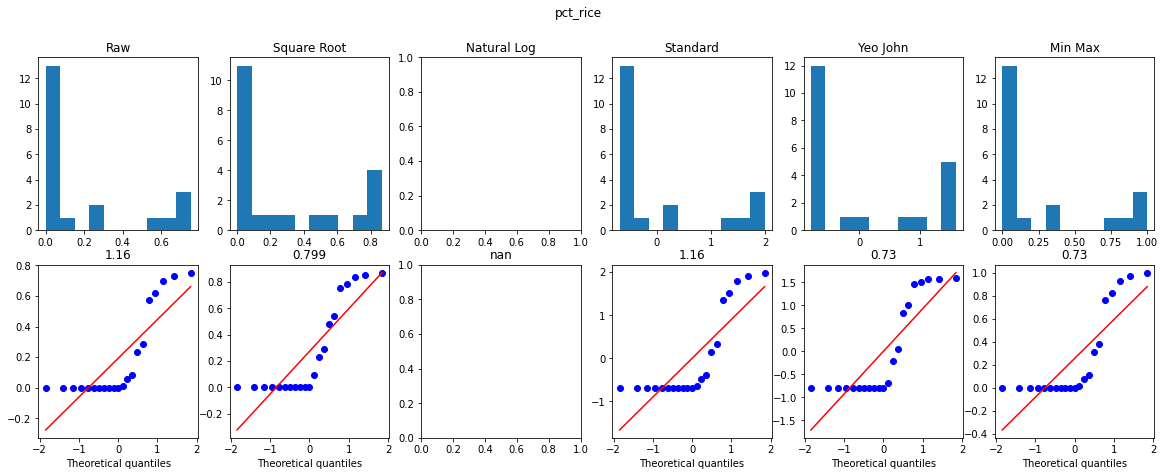

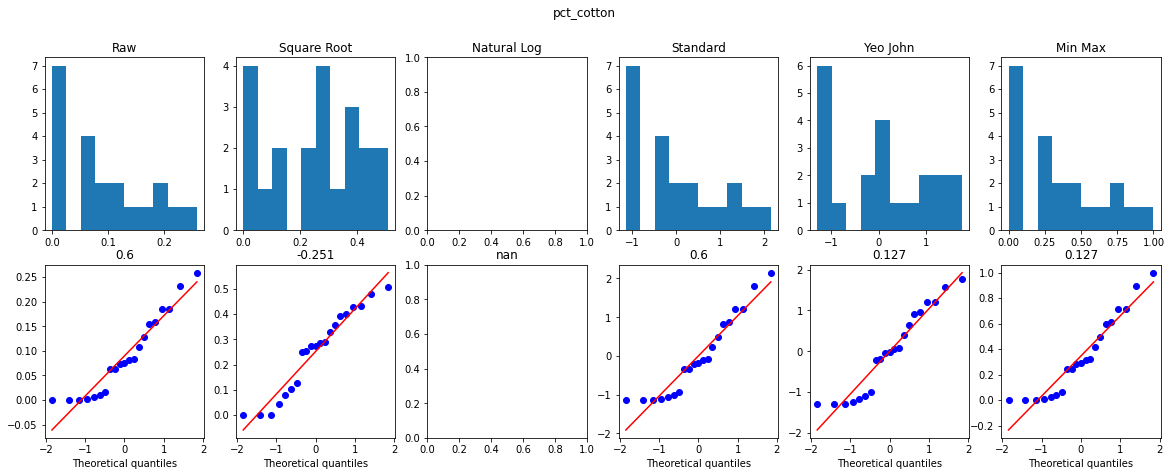

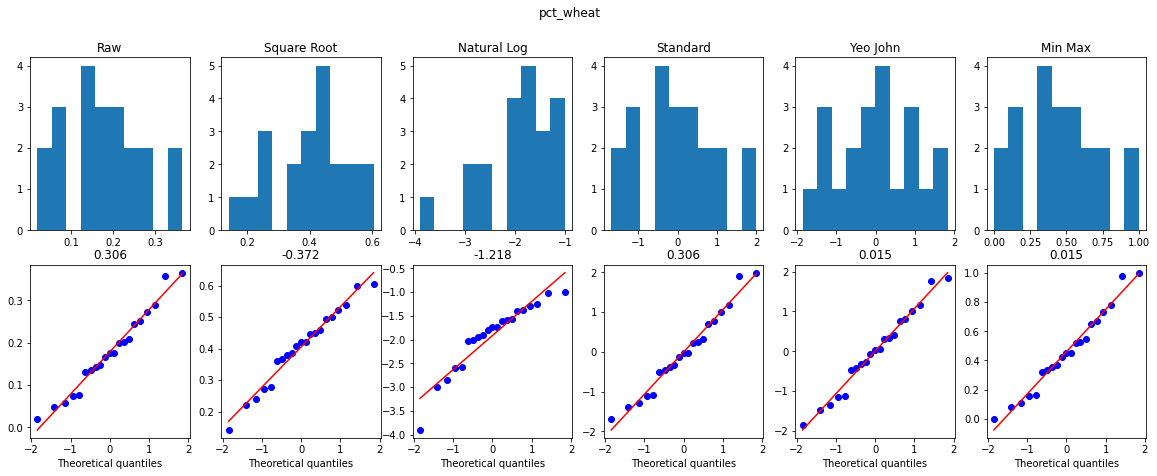

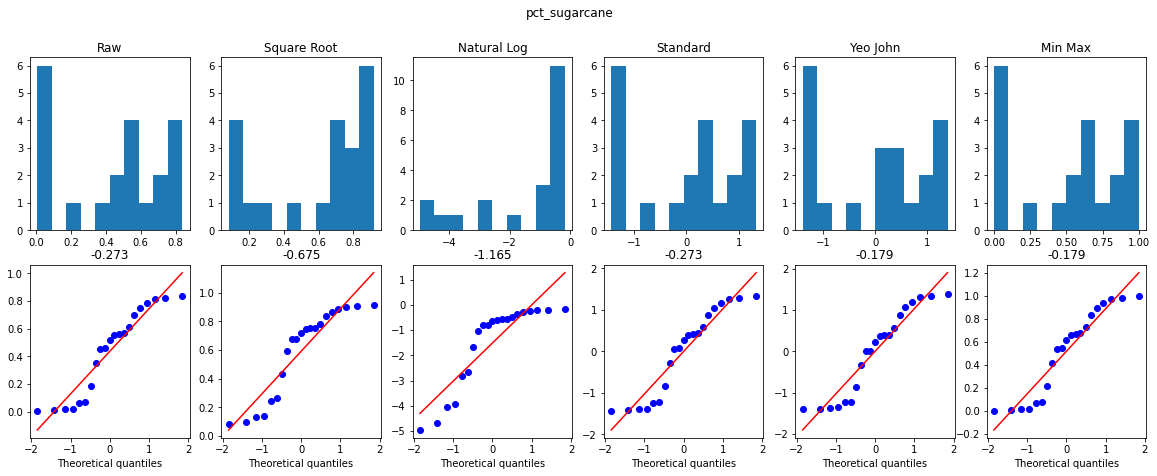

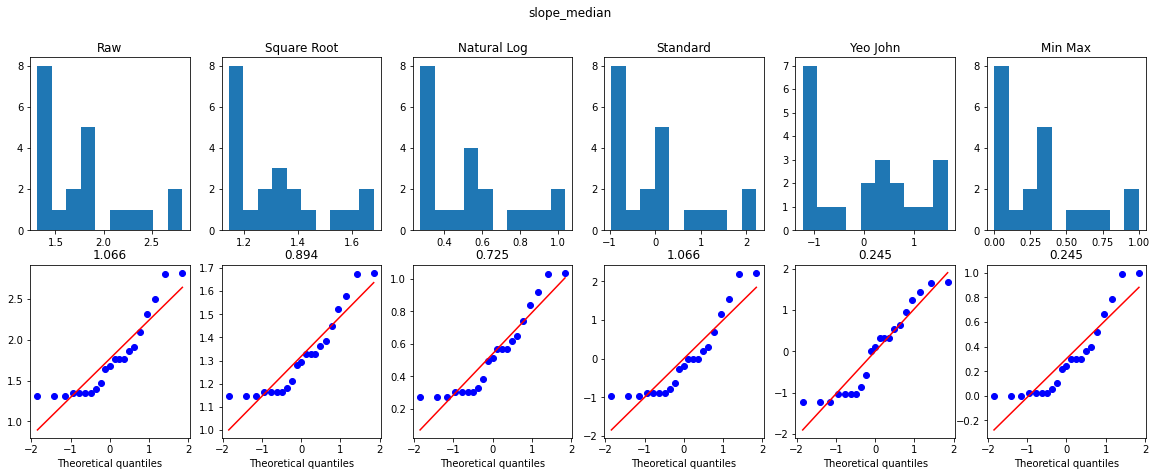

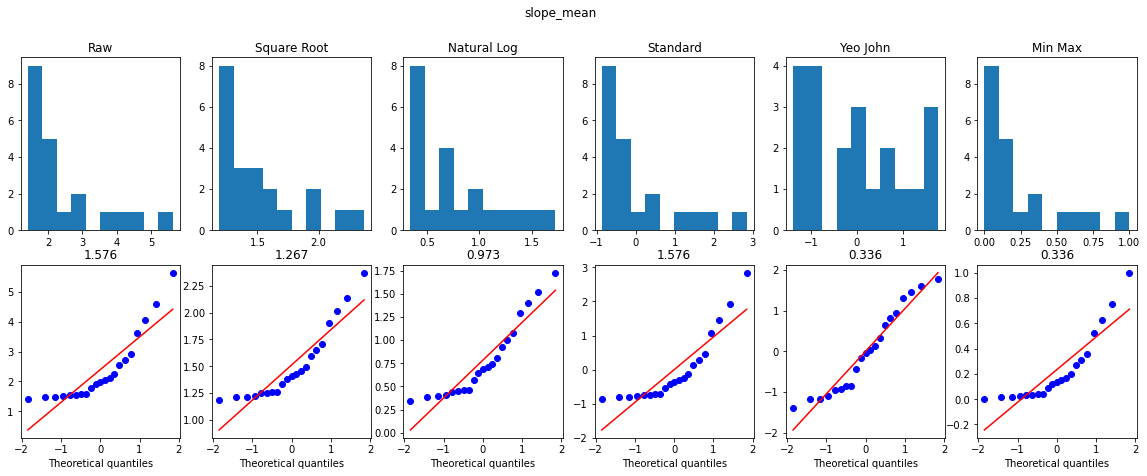

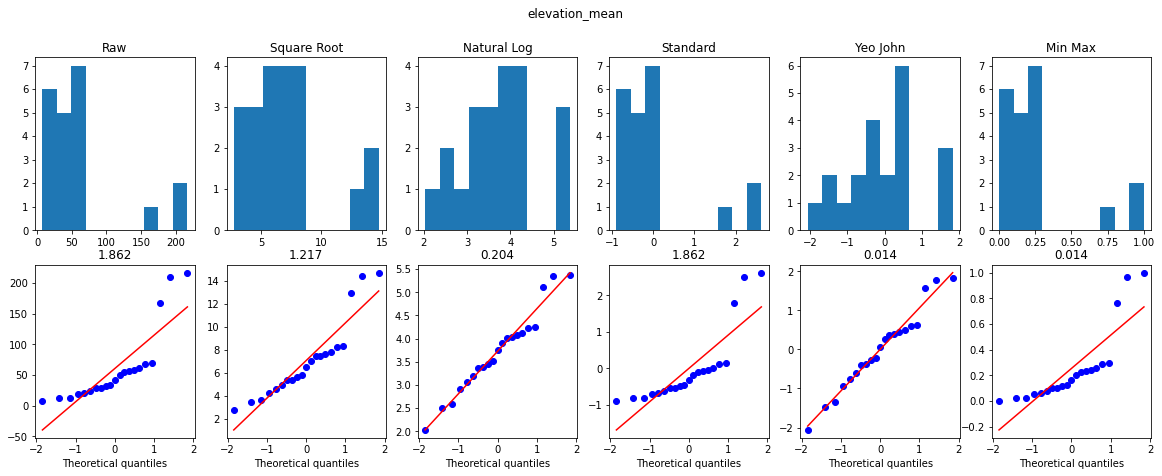

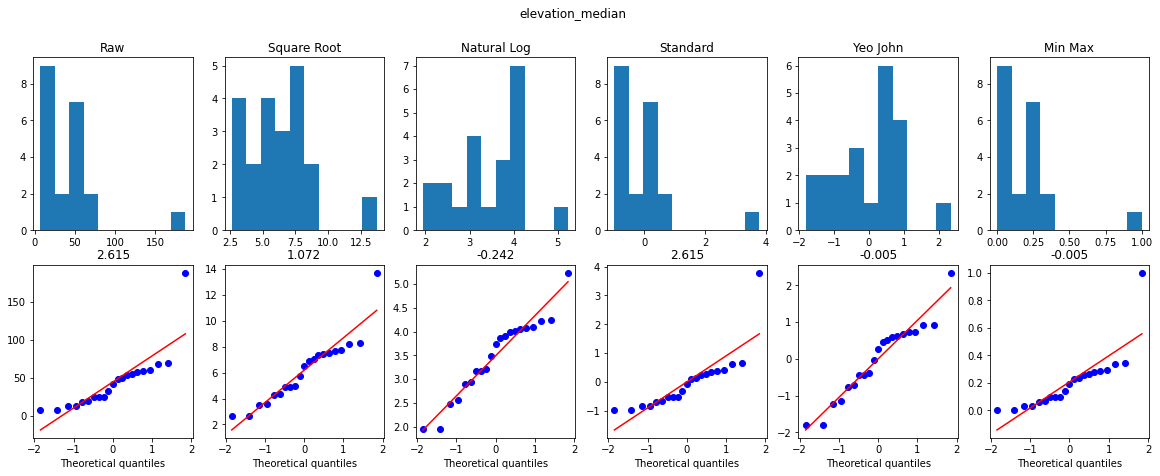

In [49]:
# Hypothesis 3

# all references to `left bank` are actually for the right bank

df = pd.read_csv("/Users/josepherlanger/Hertie/Pakistan Reading Material/datasets/h3_data_final.csv", index_col="district")

df.rename(columns={"2020_max_inundation_pct" : "2022 Inundation Pct"}, inplace=True)
df["is_left_bank"] = np.where(np.isin(df["division"],['Larkana','Hyderabad']),1,0)
df["fertilizer 5yr kg"] = df["fertilizer_5yr_avg"] * 1000
df["fertilizer intensity 5yr"] = (df["fertilizer 5yr kg"] / df["Total Cropped Area (Hectare) 5y"])
df["division_code"] = pd.factorize(df["division"])[0]
df["division*intensity"] = df["division_code"] * df["fertilizer intensity 5yr"]
df["left*intensity"] = df["is_left_bank"] * df["fertilizer intensity 5yr"]

dfh3 = df.loc[:,[
                 "pct_total_province",
                 "pct_net_area_sown 5y",
                 "pct_unirrigated_cropland 2019",
                 "pct_canal_cropland 2019",
                 "pct_forest_area",
                 "2022 Inundation Pct",
                 "2010_max_inundation_pct",
                 "elevation_mean",
                 "slope_mean",
                 "is_left_bank",
                 "fertilizer intensity 5yr",
                 "left*intensity",
                 "pct_cotton",
                 "pct_rice",
                 "pct_sugarcane",
                 "pct_wheat",
                 "pct_bajra",
                 "pct_mangoes",
                 "pct_papaya",
                 "pct_onion"
                ]]

fig = plt.figure(figsize=(10, 10))

corr_cols = dfh3.columns
corr_ticks = []

for i in range(0,len(corr_cols)):
    corr_ticks.append(i)

ax = plt.matshow(dfh3[corr_cols].corr(), fignum=fig.number, cmap='PiYG')
fig.colorbar(ax,fraction=0.046, pad=0.04)

plt.xticks(ticks=corr_ticks, labels=corr_cols, rotation=45, fontsize=8, ha='left')
plt.yticks(ticks=corr_ticks, labels=corr_cols, fontsize=8)
plt.title("Correlation Matrix \nHypothesis 3", x=-0.2, y=1.1, fontsize=16)

# Skewness Evaluation

for col in ["fertilizer intensity 5yr",
            "2010_max_inundation_pct",
            "2022 Inundation Pct",
            "pct_forest_area",
            "pct_rice",
            "pct_cotton",
            "pct_wheat",
            "pct_sugarcane",
            "slope_median",
            "slope_mean",
            "elevation_mean",
            "elevation_median"]:
    
    skewness_transform(df,col)

In [50]:
# Hypothesis 3 Main Regression

df["log_fertilizer"] = np.log(df["fertilizer intensity 5yr"])
df["log_left*intensity"] = df["is_left_bank"] * df["log_fertilizer"]
df["2010_max_percent"] = df["2010_max_inundation_pct"] * 100
df["forest"] = df["pct_forest_area"] * 100
df["rice"] = df["pct_rice"] * 100

exo = ["fertilizer intensity 5yr",
       "2010_max_percent",
       "is_left_bank",
       "left*intensity",
       "rice",
       "forest",
       "slope_mean",
       "elevation_mean"
      ]

end = "2022 Inundation Pct"

with open('h3_mainregression.txt','w') as fh:
    fh.write(ols(df[exo],df[end]).summary().as_text())
    
with open('h3_inundation_regression.txt','w') as fh:
    fh.write(ols(df["2022 Inundation Pct"]*100,
    df["inundation_withdrawal_rate"]*100
   ).summary().as_text())